In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#making a directory
!mkdir ~/.kaggle

In [ ]:
#Copy the kaggle.json to created folder
!/content/kaggle.json ~/.kaggle/

In [ ]:
#permisson for the json to act
! chmod 600 /content/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d maajdl/yeh-concret-data

In [ ]:
! unzip /content/yeh-concret-data.zip

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Concrete_Data_Yeh.csv')

In [ ]:
df.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Data Cleaning**

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

Filling the null value with the mean of the age column in the df

**train_test_split is found in model_selection**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=['age']) , df['age'] , test_size=0.3 , random_state=0)


In [ ]:
x_train.head(5)  #contains independent columns

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,csMPa
772,382.0,0.0,0.0,186.0,0.0,1047.0,739.0,24.00
997,310.0,142.8,0.0,167.9,10.0,914.3,804.0,45.30
724,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,35.76
167,475.0,118.8,0.0,181.1,8.9,852.1,781.5,74.19
764,385.0,0.0,0.0,186.0,0.0,966.0,763.0,14.70


In [ ]:
y_train.head(5) #contains dependent/target column

772     7
997    28
724    90
167    91
764     3
Name: age, dtype: int64

dist and QQ plot of each x_train

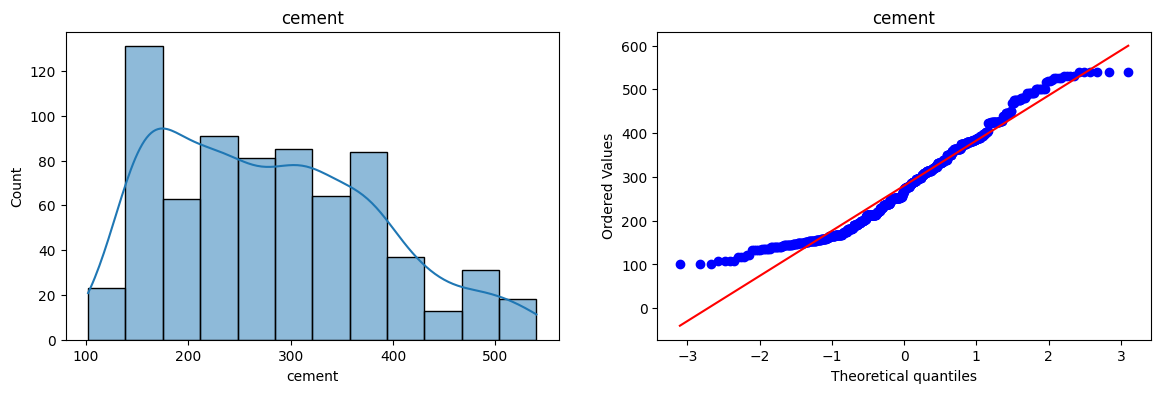

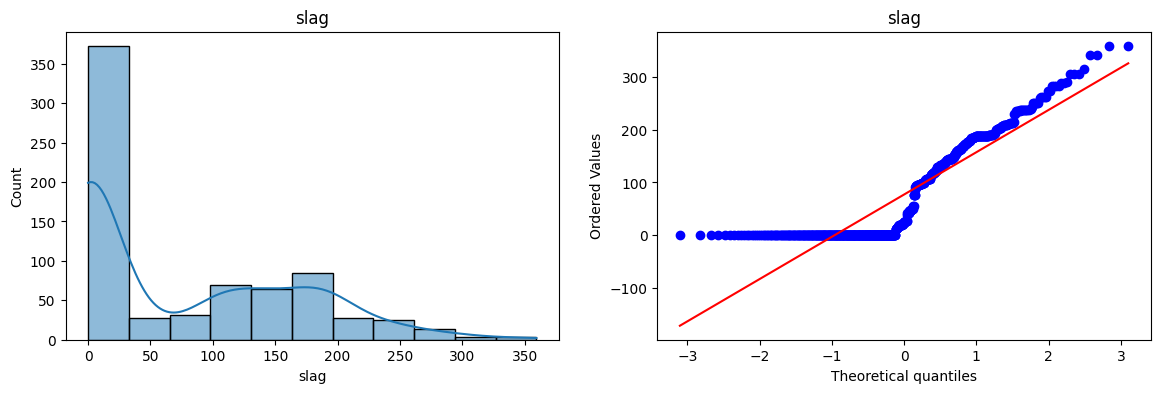

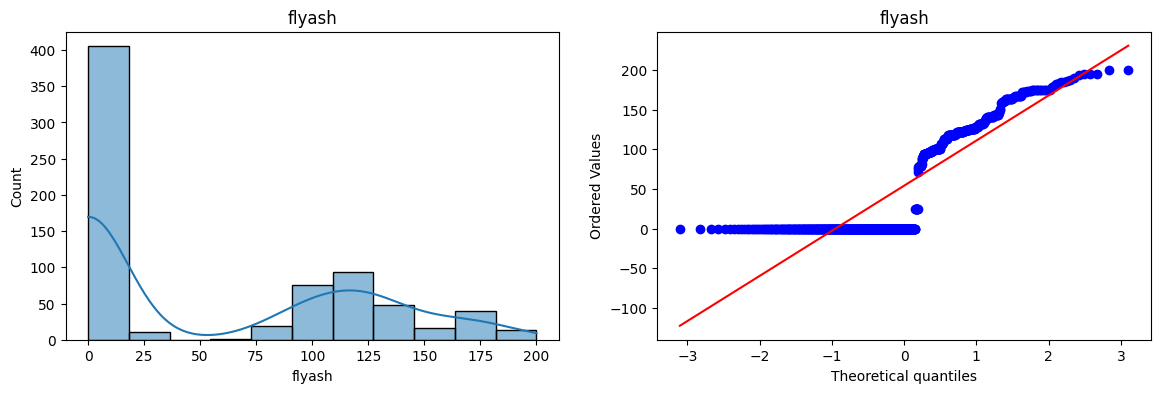

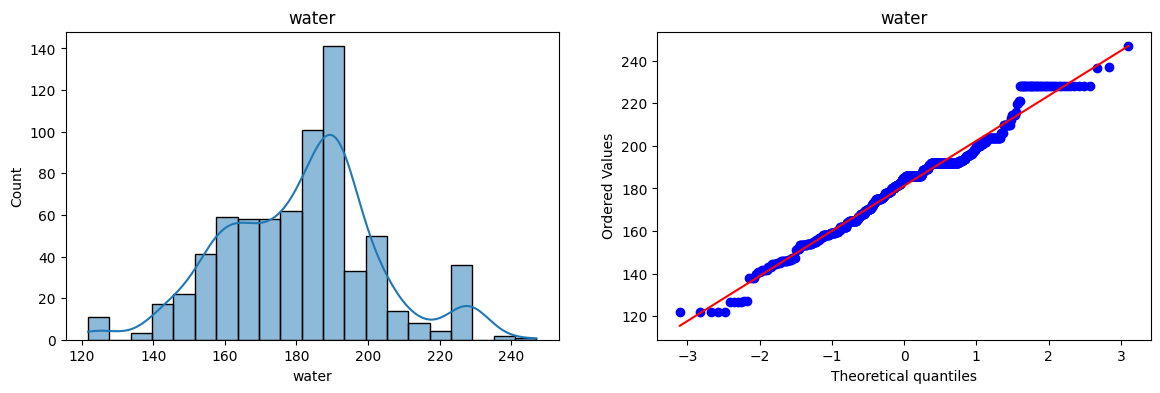

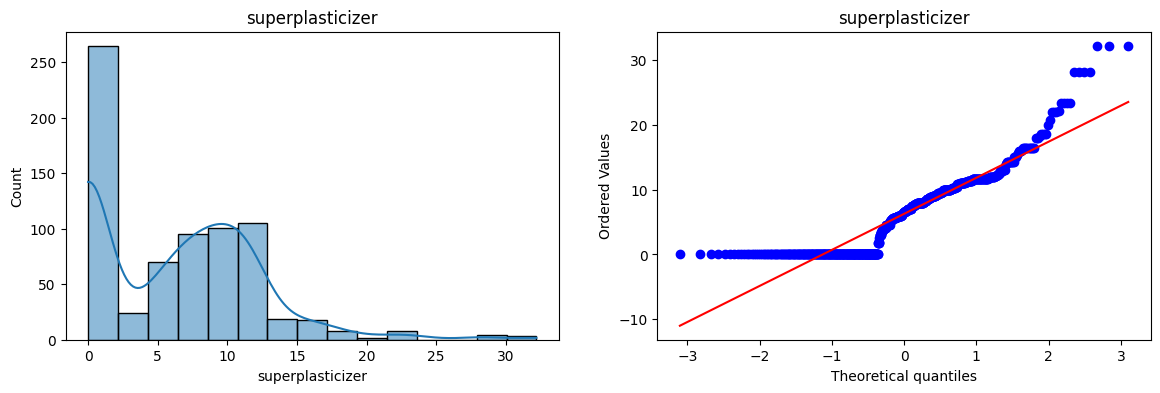

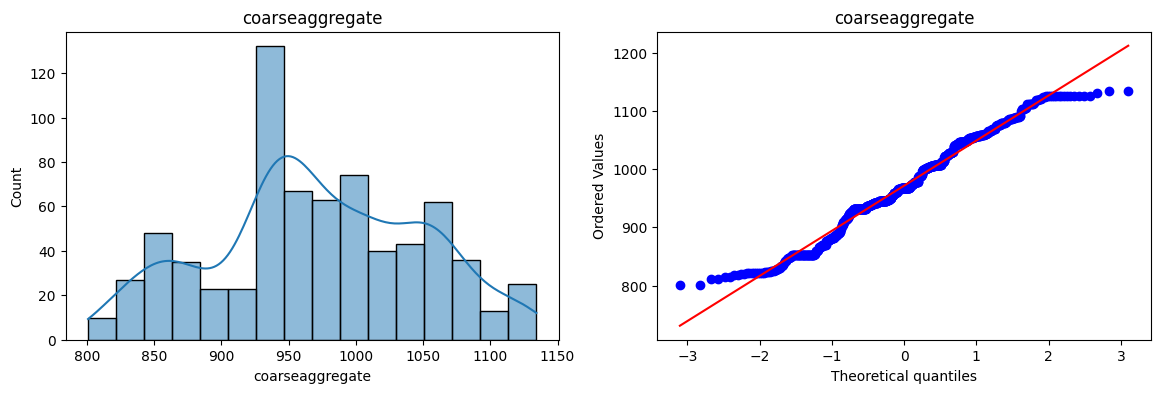

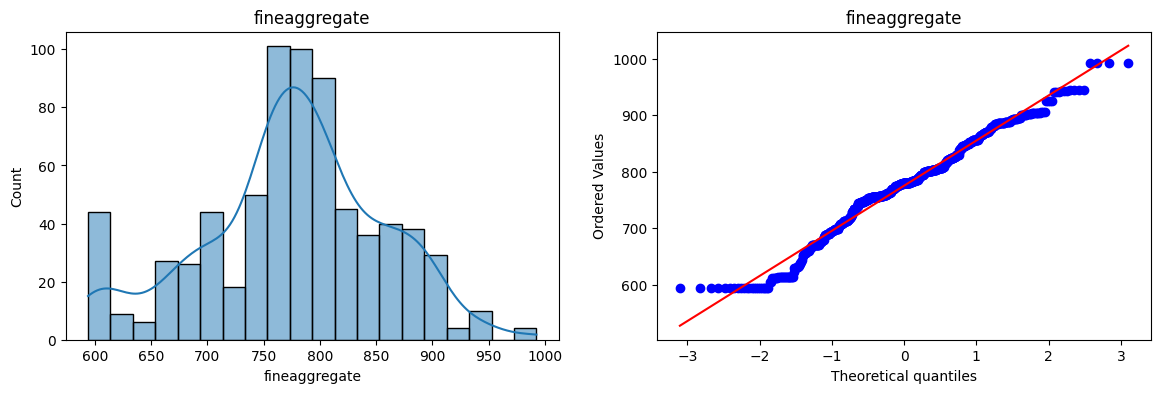

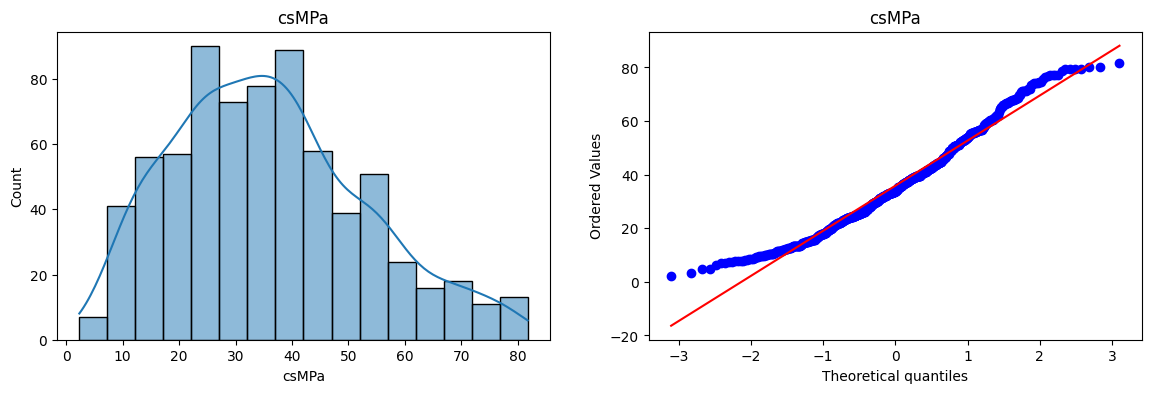

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

for col in x_train:
  plt.figure(figsize=(14,4))

  plt.subplot(121) #121: 1 row, 2 columns, subplot 1.
  sns.histplot(x_train[col] , kde=True)  #kde=True adds a kernel density estimate curve to your histogram.
  plt.title(col)

  plt.subplot(122) #122: 1 row, 2 columns, subplot 2.
  stats.probplot(x_train[col] , dist = 'norm' , plot = plt)
  plt.title(col)

plt.show()

**Applying Box-Cox **

In [ ]:
from sklearn.preprocessing import PowerTransformer , FunctionTransformer
import pandas as pd

pt=PowerTransformer(method='box-cox')
# to handle from  0 values
episilon = 1e-5
x_train_trans = pt.fit_transform(x_train + episilon)
x_test_trans = pt.transform(x_test + episilon)

pd.DataFrame( {'cols':x_train.columns , 'lambda value':pt.lambdas_ })



,cols,lambda value
0,cement,0.183828
1,slag,0.031676
2,flyash,-0.046168
3,water,0.925279
4,superplasticizer,0.123198
5,coarseaggregate,1.144747
6,fineaggregate,1.771619
7,csMPa,0.533107


**Applying LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_trans , y_train)
y_pred=lr.predict(x_test_trans)
r2_score(y_test , y_pred)

0.36933030538901035

In [ ]:
from sklearn.model_selection import cross_val_score
print("After cross_val_score ",cross_val_score(lr , x_train_trans , y_train , cv=5 , scoring='r2').mean())

After cross_val_score  0.3364624289943401


QQ plot Before and after Transformation of x_train and x_train_trans respectively

In [ ]:
x_train_trans   # this is a numpy array

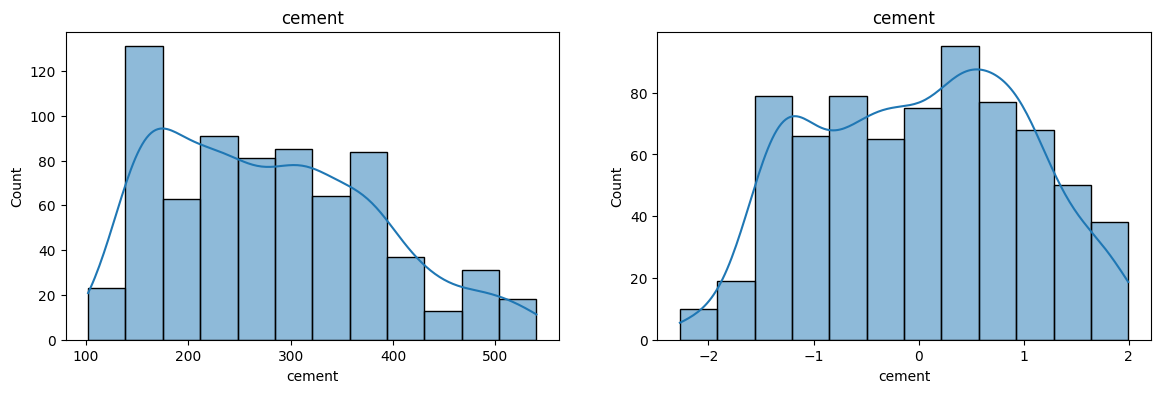

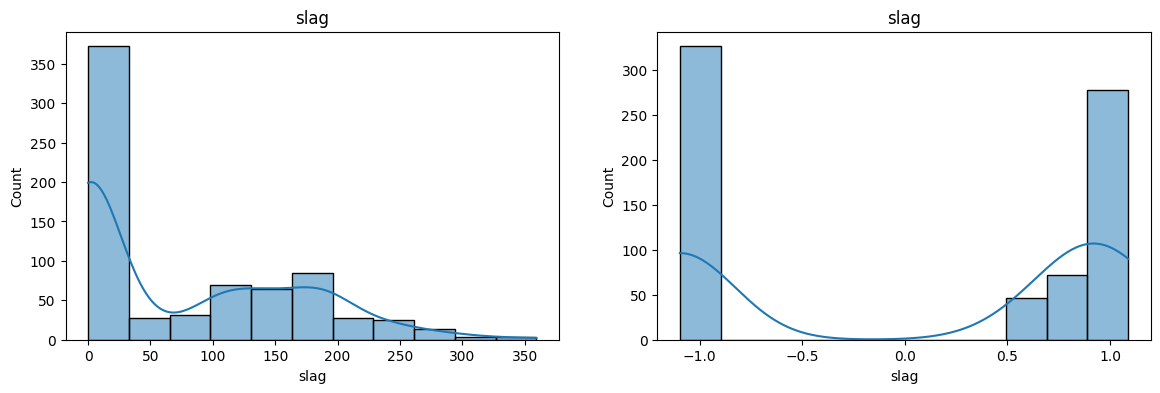

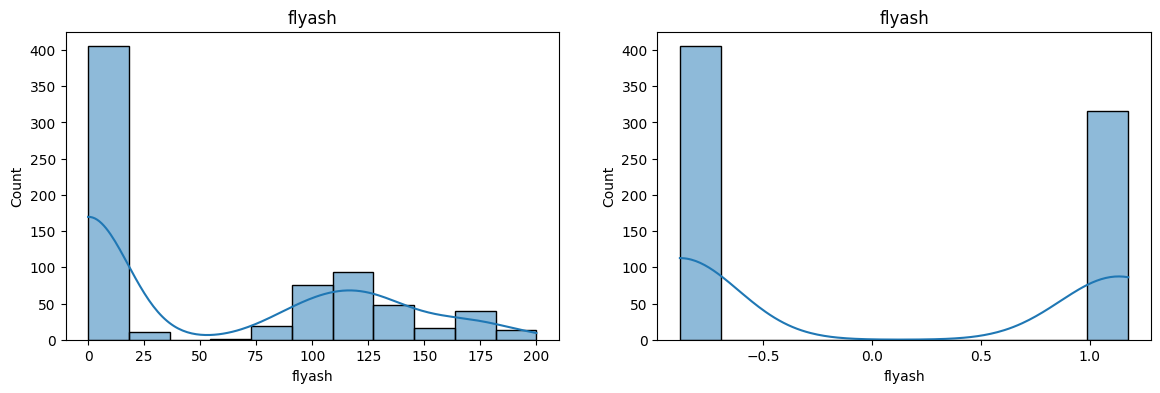

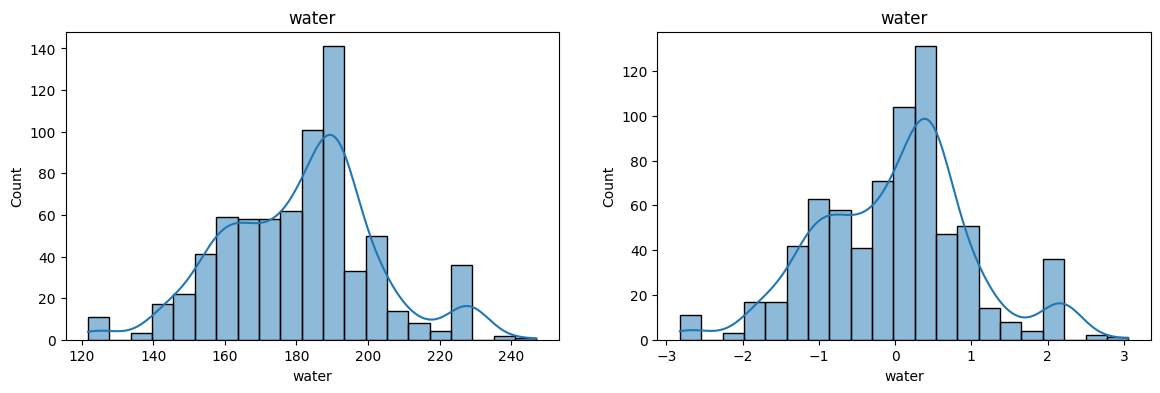

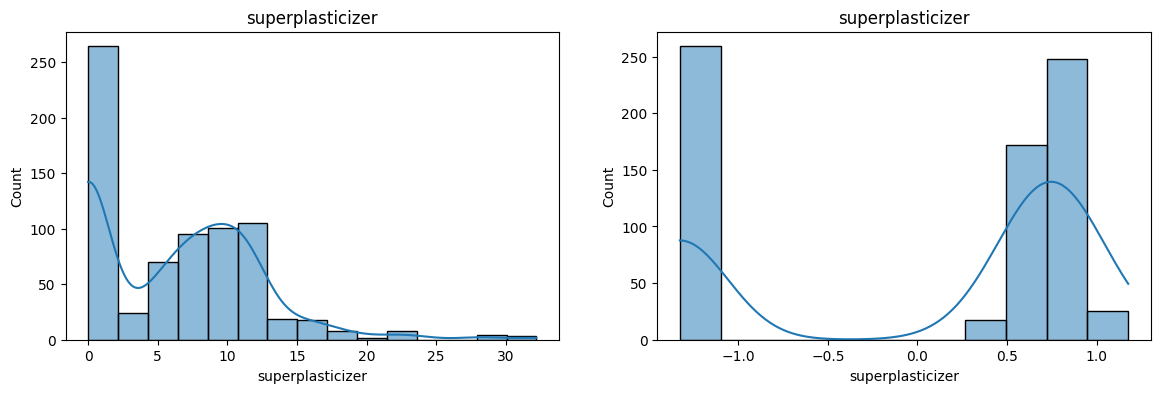

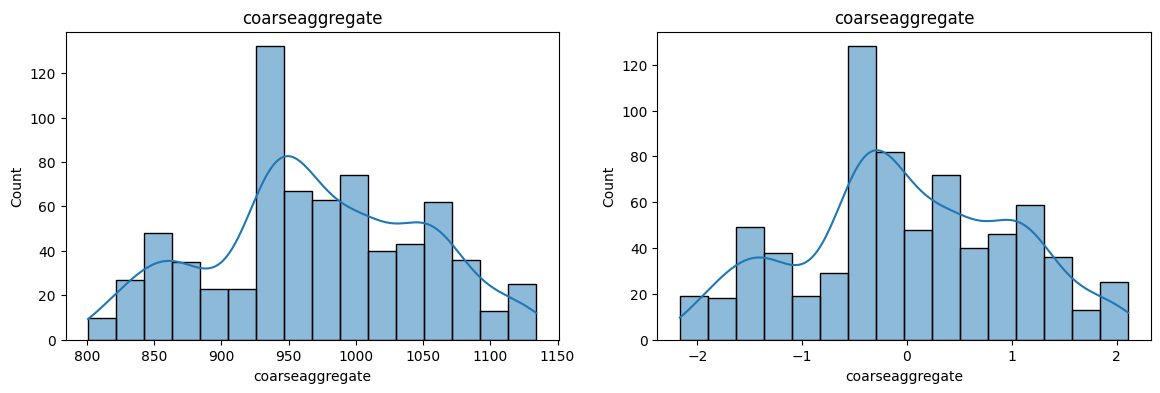

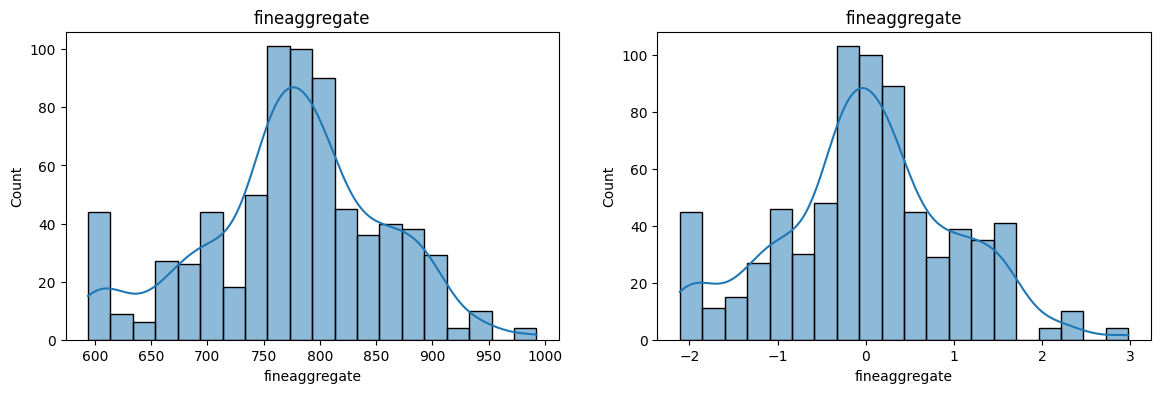

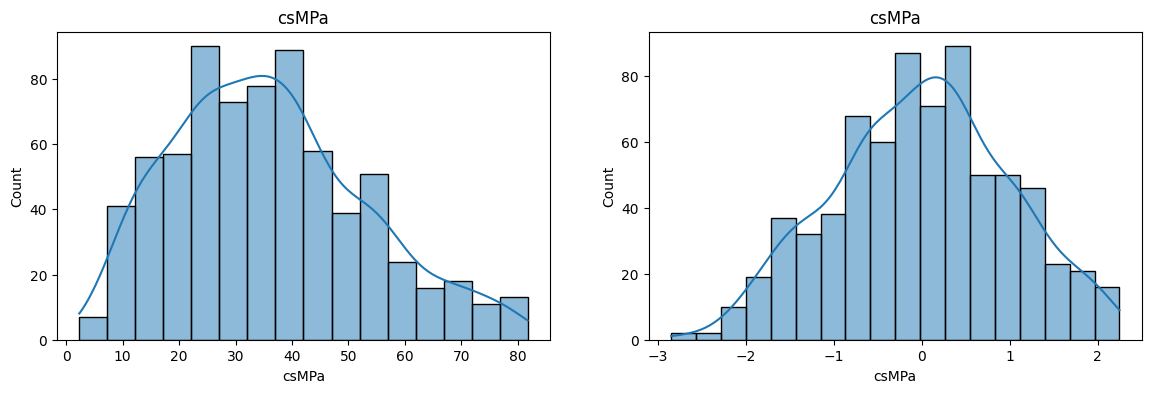

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

x_train_trans=pd.DataFrame(x_train_trans , columns = x_train.columns)
for col in x_train:
  plt.figure(figsize=(14,4))

  plt.subplot(121) #121: 1 row, 2 columns, subplot 1.
  sns.histplot(x_train[col] , kde=True)
  plt.title(col)

  plt.subplot(122) #122: 1 row, 2 columns, subplot 2.
  # stats.probplot(x_train_trans[col] , dist = 'norm' , plot = plt)
  sns.histplot(x_train_trans[col],kde=True)
  plt.title(col)

plt.show()

**Apply Yeo-Johnson**

In [ ]:
from sklearn.preprocessing import PowerTransformer , FunctionTransformer
import pandas as pd

pt=PowerTransformer()

x_train_trans = pt.fit_transform(x_train)
x_test_trans = pt.transform(x_test)

pd.DataFrame( {'cols':x_train.columns , 'lambda value':pt.lambdas_ })

,cols,lambda value
0,cement,0.181196
1,slag,0.028011
2,flyash,-0.165526
3,water,0.924736
4,superplasticizer,0.286946
5,coarseaggregate,1.145007
6,fineaggregate,1.772672
7,csMPa,0.516343


In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train_trans , y_train)
y_pred=lr.predict(x_test_trans)
r2_score(y_test , y_pred)

0.36933030538901035

In [ ]:
from sklearn.model_selection import cross_val_score
print("After cross_val_score ",cross_val_score(lr , x_train_trans , y_train , cv=5 , scoring='r2').mean())
from sklearn.metrics import r2_score

After cross_val_score  0.3364624289943401


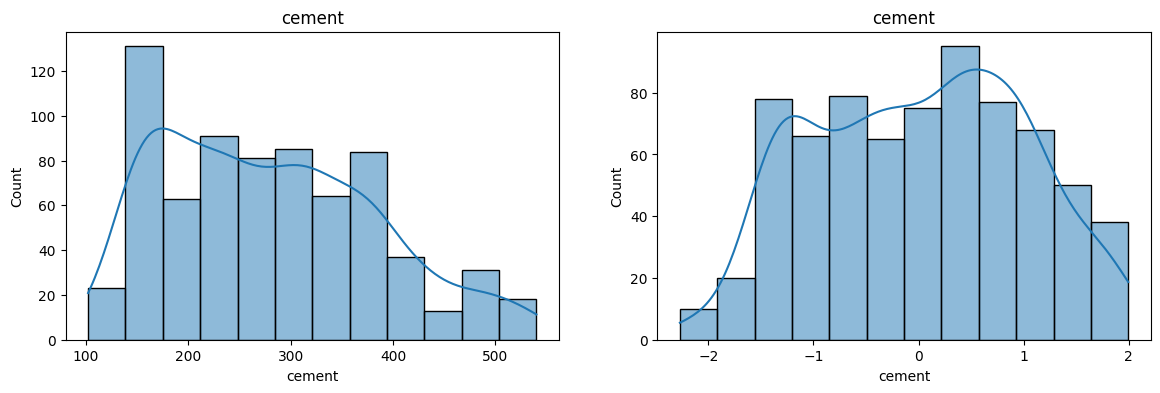

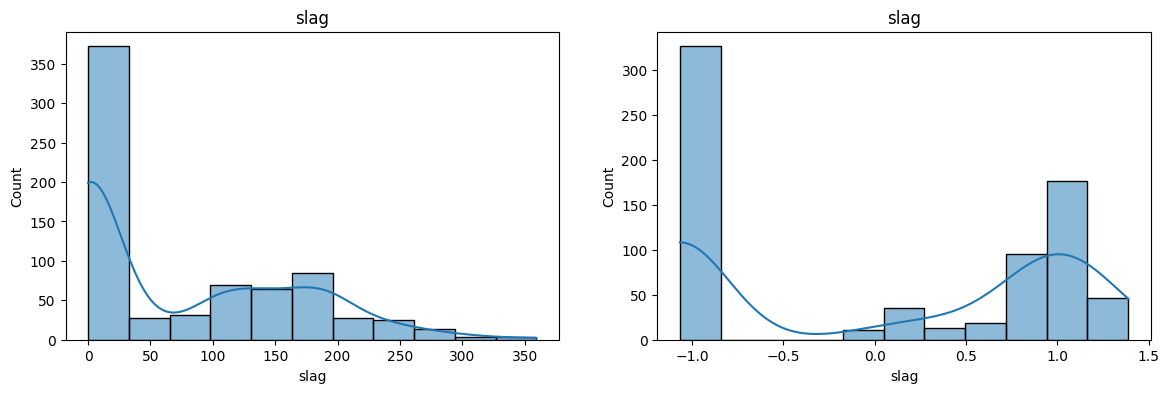

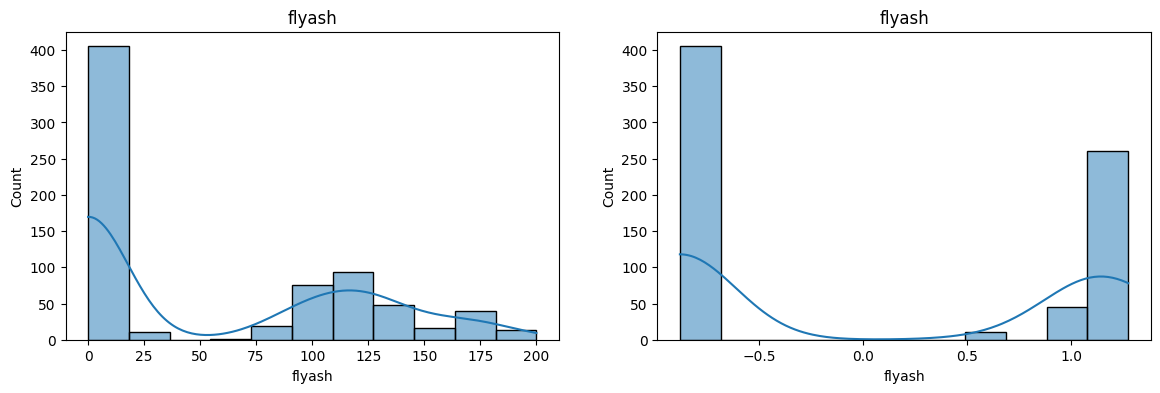

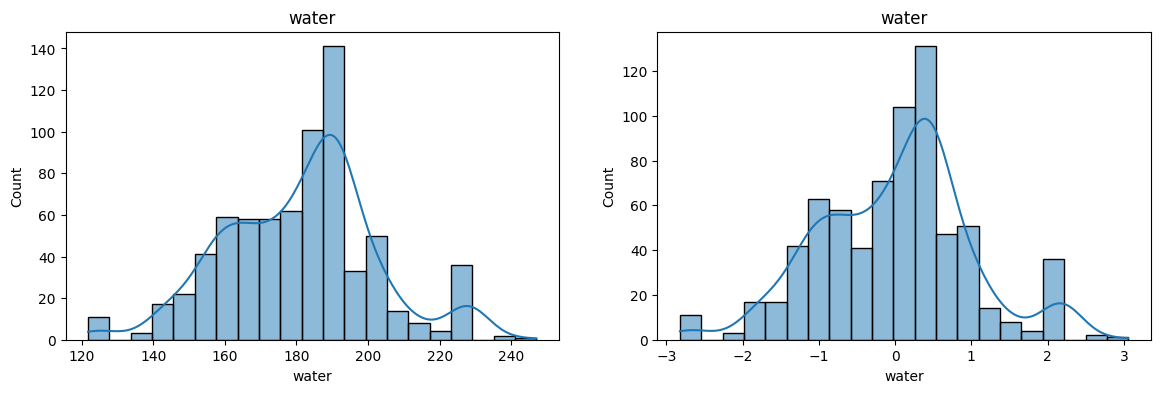

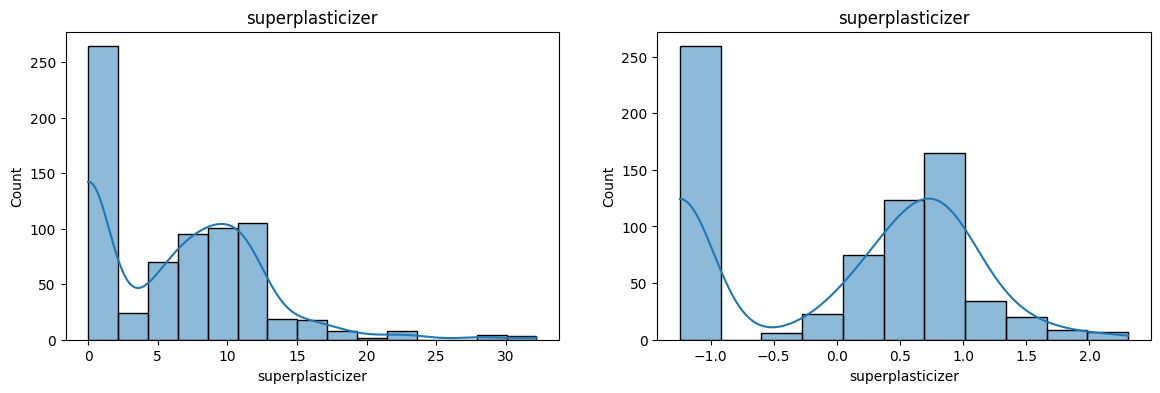

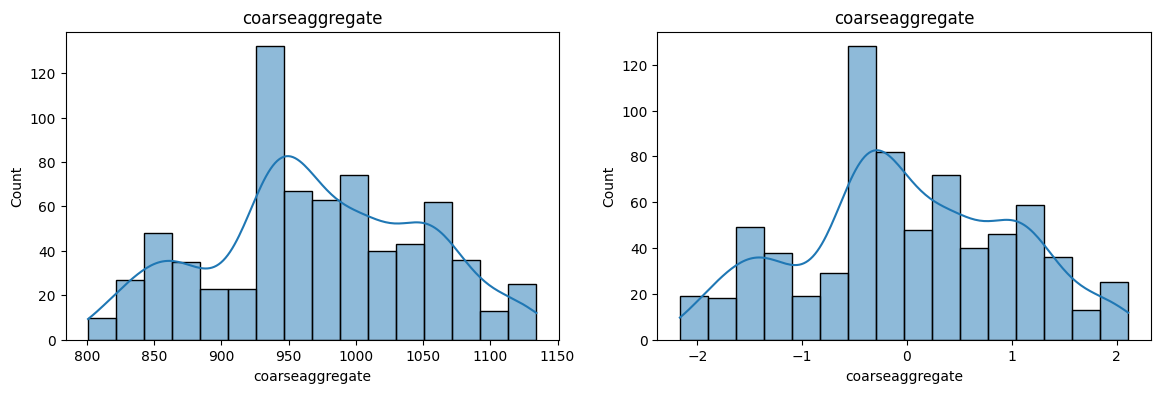

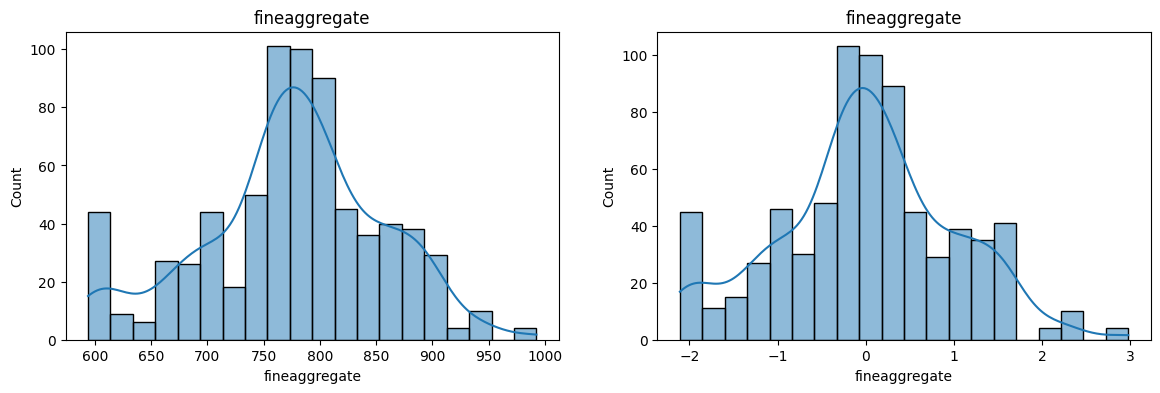

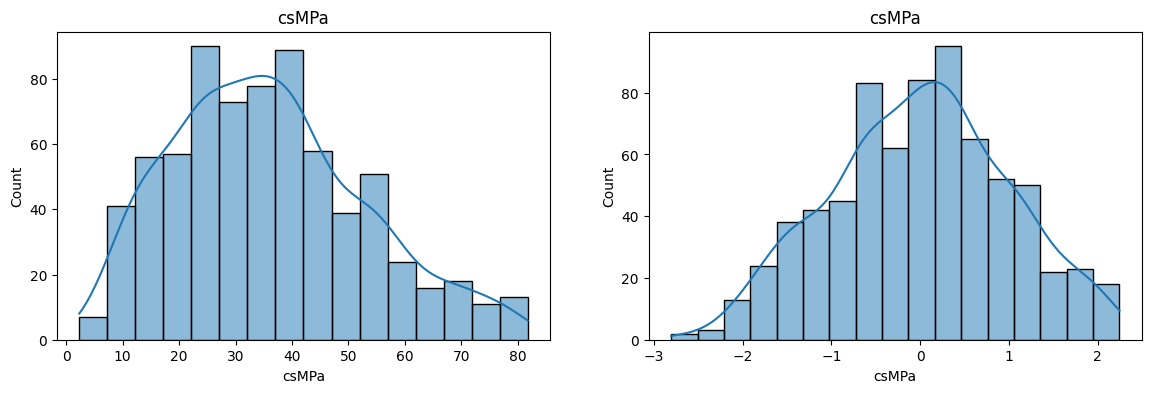

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

x_train_trans=pd.DataFrame(x_train_trans , columns = x_train.columns)
for col in x_train:
  plt.figure(figsize=(14,4))

  plt.subplot(121) #121: 1 row, 2 columns, subplot 1.
  sns.histplot(x_train[col] , kde=True)
  plt.title(col)

  plt.subplot(122) #122: 1 row, 2 columns, subplot 2.
  # stats.probplot(x_train_trans[col] , dist = 'norm' , plot = plt)
  sns.histplot(x_train_trans[col],kde=True)
  plt.title(col)

plt.show()

In [ ]:
from google.colab import files
files.download('your_notebook_file_name.ipynb')


FileNotFoundError: Cannot find file: your_notebook_file_name.ipynb